In [1]:
import pandas as pd #
import numpy as np #
from pathlib import Path


In [109]:
filepath=('cleaned_data.csv')
df=pd.read_csv(filepath,infer_datetime_format=True,parse_dates=['Date'])

In [110]:
df.head()

,Unnamed: 0,Status,ZipCode,City,Price,Days_on_market,Beds,Baths,Sqft,Date,Acres,Lot_sqft,Liv_index
0,0,A,98001,Auburn,725000,4.0,3.0,0.00,3060,2021-05-26,0.227,9894.0,68.0
1,1,A,98001,Auburn,300000,4.0,2.0,1.00,920,2021-05-26,0.164,7150.0,68.0
2,2,S,98001,Auburn,555000,3.0,2.0,1.00,1196,2021-05-07,0.544,23689.0,68.0
3,3,A,98001,Auburn,1300000,220.0,4.0,1.75,2850,2020-10-22,6.000,261360.0,68.0
4,4,S,98001,Auburn,250000,46.0,2.0,1.50,1200,2021-05-20,0.220,9600.0,68.0


In [116]:
#  Create our features
X=df.copy()
X.drop(['Price','Unnamed: 0','City','Date'],axis=1,inplace=True)

# Create our target
y=df['Price']

In [117]:
X.shape

(4128, 9)

In [118]:
y.shape

(4128,)

In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Status          4128 non-null   object 
 1   ZipCode         4128 non-null   int64  
 2   Days_on_market  4128 non-null   float64
 3   Beds            4128 non-null   float64
 4   Baths           4128 non-null   float64
 5   Sqft            4128 non-null   int64  
 6   Acres           4128 non-null   float64
 7   Lot_sqft        4128 non-null   float64
 8   Liv_index       4128 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 290.4+ KB


In [120]:
X=pd.get_dummies(X) # to convert objects into binary data

In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ZipCode         4128 non-null   int64  
 1   Days_on_market  4128 non-null   float64
 2   Beds            4128 non-null   float64
 3   Baths           4128 non-null   float64
 4   Sqft            4128 non-null   int64  
 5   Acres           4128 non-null   float64
 6   Lot_sqft        4128 non-null   float64
 7   Liv_index       4128 non-null   float64
 8   Status_A        4128 non-null   uint8  
 9   Status_S        4128 non-null   uint8  
dtypes: float64(6), int64(2), uint8(2)
memory usage: 266.2 KB


In [122]:
X.shape

(4128, 10)

### Split the X and Y ###

In [123]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [124]:
print(X_train.shape)
print(X_test.shape)

(3302, 10)
(826, 10)


In [125]:
print(y_train.shape)
print(y_test.shape)

(3302,)
(826,)


### Data Pre-processing ###

In [126]:
# Using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [127]:
X_scaler=scaler.fit(X_train)

In [128]:
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [129]:
print('X_test_scaled :', X_test_scaled[:1])
print('X_train_scaled',X_train_scaled[:1])

X_test_scaled : [[-0.93422297 -0.12687495  1.41539607  1.71233807  2.22337176 -0.06494364
  -0.06478851  1.18313042 -0.6799677   0.6799677 ]]
X_train_scaled [[-1.37956184  0.27969029  0.46624136  0.11129405  0.97401436 -0.1561647
  -0.15623534 -0.00623136 -0.6799677   0.6799677 ]]


### Model ###

In [130]:
from sklearn import linear_model
model=linear_model.LinearRegression()

In [131]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [141]:
accuracy=model.score(X_test_scaled,y_test)
print(f'Linear Regression accuracy: {accuracy*100}')

Linear Regression accuracy: 56.43667061485132


In [133]:
print('coefficients :',model.coef_)

coefficients : [ 7.93498577e+04  1.04593393e+05 -2.81964472e+05  8.31766443e+04
  9.26594046e+05  1.46455303e+08 -1.46465151e+08  9.07605448e+04
  2.23846581e+04 -2.23846583e+04]


In [134]:
print('intercept :',model.intercept_)

intercept : 1175024.7801332548


In [135]:
predictions=model.predict(X_test_scaled)
print(predictions)

[ 2.94598135e+06  1.55414021e+06  1.11357449e+06  8.57792808e+05
  2.64838446e+06  1.32200610e+06  5.41546254e+05  7.22520444e+05
  2.11676832e+06  1.54645658e+06  1.80617419e+06  2.20860005e+06
  2.80011591e+06  4.24097458e+06  9.22630157e+05  1.36555030e+06
  5.18200925e+05  8.09748942e+05  1.30931770e+06  2.03209289e+06
  5.59626794e+05  6.54138924e+05  1.46293871e+06  9.79820505e+05
  5.07848056e+06  6.81133120e+05  2.16655341e+06  9.03400213e+05
  6.15768741e+05  2.73427233e+06  5.77994681e+05  1.25887941e+06
  8.35269689e+05  9.21280980e+05  1.23677828e+06  9.40099360e+05
  5.02978774e+05  1.27023078e+06  1.23183862e+06  1.04123750e+06
  1.27924350e+06  1.48503557e+06  6.29234253e+05  4.04675099e+05
  8.78386512e+05  8.09667426e+05  3.17167932e+05  1.24489898e+06
  7.04676974e+05  1.45053597e+06  7.15430601e+05  8.85885437e+05
  1.44597104e+06  1.96065385e+06  6.69120591e+05  9.22949208e+05
  1.94237560e+06  2.37192052e+06  5.76675347e+05  9.54858178e+05
  3.23185335e+05  3.36368

In [136]:
out_of_sample_results=y_test.to_frame()

out_of_sample_results['Out_of_sample_predictions']=predictions

<AxesSubplot:>

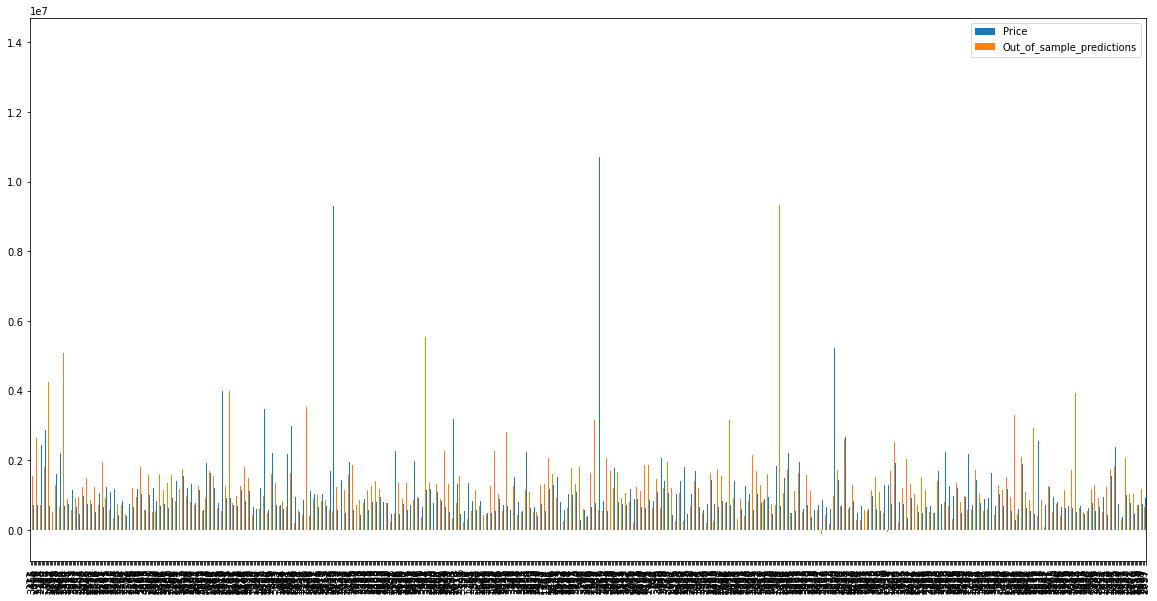

In [137]:
out_of_sample_results.plot(kind='bar',figsize=(20,10))

In [138]:
out_of_sample_results.head()

,Price,Out_of_sample_predictions
123,6000000,2.945981e+06
3455,780000,1.554140e+06
416,713410,1.113574e+06
2084,1161000,8.577928e+05
718,1750000,2.648384e+06


In [139]:
# Calculate 
from sklearn.metrics import mean_squared_error, r2_score
out_of_sample_results_mse=mean_squared_error(out_of_sample_results['Price'],out_of_sample_results['Out_of_sample_predictions'])

out_of_sample_results_rmse=np.sqrt(out_of_sample_results_mse)

print(f'Linear regression rmse : {out_of_sample_results_rmse}')

Linear regression rmse : 793399.2890697018


### Lasso Regression Model ###

In [142]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel



In [148]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005, random_state=1,normalize=True,max_iter=1000000))

feature_sel_model.fit(X_train_scaled,y_train)

C:\Users\sumit\anaconda3\envs\deepenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 612963663749343.1, tolerance: 504178679214.9251
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, max_iter=1000000, normalize=True,
                                random_state=1))

In [145]:
help(Lasso( ))


Help on Lasso in module sklearn.linear_model._coordinate_descent object:

class Lasso(ElasticNet)
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
 |      Given this, you should use the :class:`LinearRegression` object.
 |  
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model

In [149]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [151]:
 #let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 10
selected features: 9


In [152]:
selected_feat

Index(['ZipCode', 'Days_on_market', 'Beds', 'Baths', 'Sqft', 'Acres',
       'Lot_sqft', 'Liv_index', 'Status_A'],
      dtype='object')

In [ ]:
# Based on the above , we can reduce the no of features for the next iteration model to only the selected features

# Columns considered are ZipCode, Beds, Baths, Sqft, Acres, Liv_index, Lot_sqft 